# Лабораторная работа 3

### Цель: предсказывать цену билета на корабле Титаник
### Задачи

* Обучить логистическую регрессию, подобрать параметры
* Сравним результаты L1, L2, оценить веса признаков
* Провести отбор признаков с помощью L1 регуляризации, подобрать оптимальный С, объяcнить результат

Загрузим данные из ЛР 2 и поменяем целевой параметр. (Заменяем факт выживания на цену билета)

In [1]:
#импорт необходимых модулей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams

# результат по выживани.
trainSurvivedPath = '/home/alex/Downloads/bmstuML/dataMl/trainSurvived.plk'
testSurvivedPath = '/home/alex/Downloads/bmstuML/dataMl/testSurvived.plk'

y_train = pd.read_pickle(trainSurvivedPath)
y_test = pd.read_pickle(testSurvivedPath)


# подготовленные данные из ЛР 2
trainDataPath = '/home/alex/Downloads/bmstuML/dataMl/trainData.plk'
testDataPath = '/home/alex/Downloads/bmstuML/dataMl/testData.plk'

X_train = pd.read_pickle(trainDataPath)
X_test = pd.read_pickle(testDataPath)

# теперь цель - это цена, а не выживание
X_train['Survived'] = y_train
X_test['Survived'] = y_test

y_train = X_train['Fare']
y_test = X_test['Fare']

X_train = X_train.drop(['Fare'], axis='columns')
X_test = X_test.drop(['Fare'], axis='columns')

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       714 non-null    float64
 1   Age       714 non-null    float64
 2   SibSp     714 non-null    float64
 3   Parch     714 non-null    float64
 4   is_S      714 non-null    float64
 5   is_C      714 non-null    float64
 6   is_Q      714 non-null    float64
 7   Survived  714 non-null    float64
dtypes: float64(8)
memory usage: 44.8 KB


### Логистическая регрессия
Обучим логистическую регрессию и посмотрим результат. Для этого напишем функции: для отрисовки результата, для логистической регрессии без регуляризции, с L1, L2 регуляризции.

In [21]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge


# функция отрисовки результатов
def showResult(y_Test, test_predict, linear_model):
    rcParams['figure.figsize'] = 20,12
    x = np.arange(len(test_predict))
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(x, test_predict, label='model result')
    ax.plot(x, y_Test, label='true result')
    plt.title(linear_model)
    ax.legend()
    plt.show()
    

# без регуляризции    
def linear_reg_Simple(y_dataTrain, dataTrain, y_dataTest, dataTest):    
    reg = LinearRegression(normalize=False) # нормализация уже была в шагах ЛР 2
    reg.fit(dataTrain, y_dataTrain)
    test_score = reg.score(dataTest, y_dataTest)
    y_pred = reg.predict(dataTest)
    print('Score linear_reg_Simple:', test_score);
    print('Weight vector:', reg.coef_)
    showResult(y_dataTest, y_pred, 'linear_reg Simple')
    
# L1    
def linear_reg_Lasso(y_dataTrain, dataTrain, y_dataTest, dataTest, alpha_coef):
    reg = Ridge(alpha=alpha_coef)
    reg.fit(dataTrain, y_dataTrain)    
    test_score = reg.score(dataTest, y_dataTest)    
    print('Score L1 Lasso:', test_score); 
    print('Weight vector:', reg.coef_)
    test_predict = reg.predict(dataTest)     
    showResult(y_dataTest, test_predict, 'linear_reg L1 Lasso')
    
    
# L2    
def linear_reg_Ridge(y_dataTrain, dataTrain, y_dataTest, dataTest, alpha_coef):
    reg = Ridge(alpha=alpha_coef)
    reg.fit(dataTrain, y_dataTrain)    
    test_score = reg.score(dataTest, y_dataTest)    
    print('Score L2 Ridge:', test_score);
    print('Weight vector:', reg.coef_)
    test_predict = reg.predict(dataTest)     
    showResult(y_dataTest, test_predict, 'linear_reg L2 Ridge')
        
        
        

Score linear_reg_Simple: 0.2604852579447866
Weight vector: [-0.00051246  0.1000967   0.08192158  0.11931857 -0.06492836  0.00403586
 -0.08057696  0.04503603]


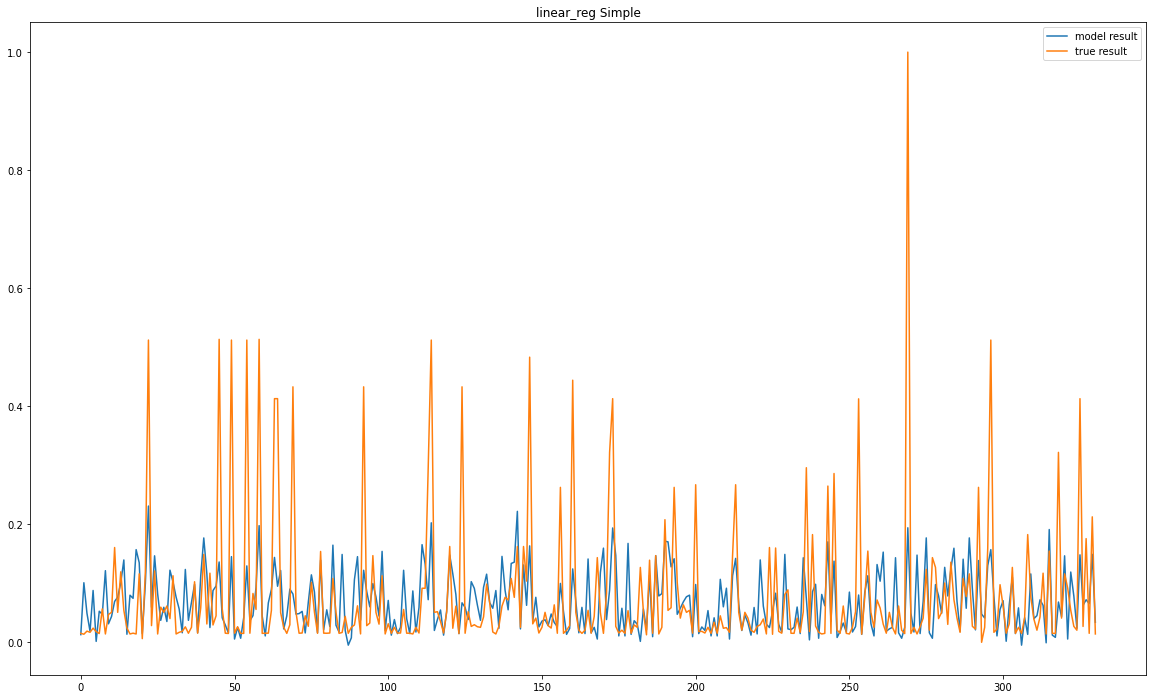

In [26]:
# логистическая регрессия без регуляризции
linear_reg_Simple(y_train, X_train, y_test, X_test)

Результат 0.26 достаточно далекий от ожидаемого.
Заметим, что фактический результат цены билета сильно выше предсказанного у некоторых пассажиров. Это сильно влияет на оценку score. Очень богатых пассажиров выкинуть из данных мы не можем, так как это не выбросы, На корабле имеется определенный процент кают для очень обеспеченных пассажиров.
Данные пригодные для оценки факта выживания на корабле не пригодны для достаточного точного определения цены билета.

Также отметим, что мы не получили огромные веса. Так как веса небольшие, то не ожидаем сильной пользы от L1 и L2. (веса небольшие, модель не переобучена, испольузем L1 и L2 для выполнения ТЗ для лабы)

#### Логистическая регрессия L1
Будем штрафовать коэффиеценты и складывать с ошибкой. В L1 используется модуль весов.
alfa_coef - умножаем веса на этот коэффиецент. Используется для влияния на вес весов.


Score L1 Lasso: 0.23998911409735468
Weight vector: [-0.00413734  0.07656473  0.06840649  0.08743718 -0.02454891  0.04266781
 -0.03476488  0.04263094]


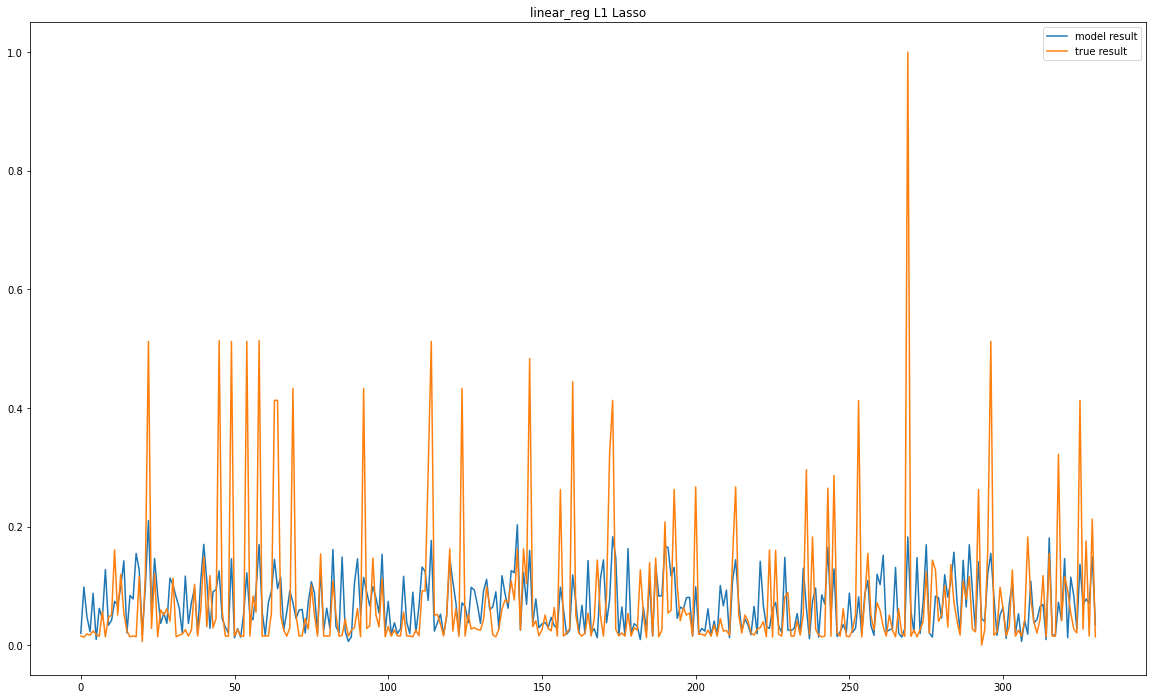

In [29]:
alfa_coef = 5
linear_reg_Lasso(y_train, X_train, y_test, X_test, alfa_coef)

#### Логистическая регрессия L2
В L2 используется квадрат весов.

Score L2 Ridge: 0.23998911409735468
Weight vector: [-0.00413734  0.07656473  0.06840649  0.08743718 -0.02454891  0.04266781
 -0.03476488  0.04263094]


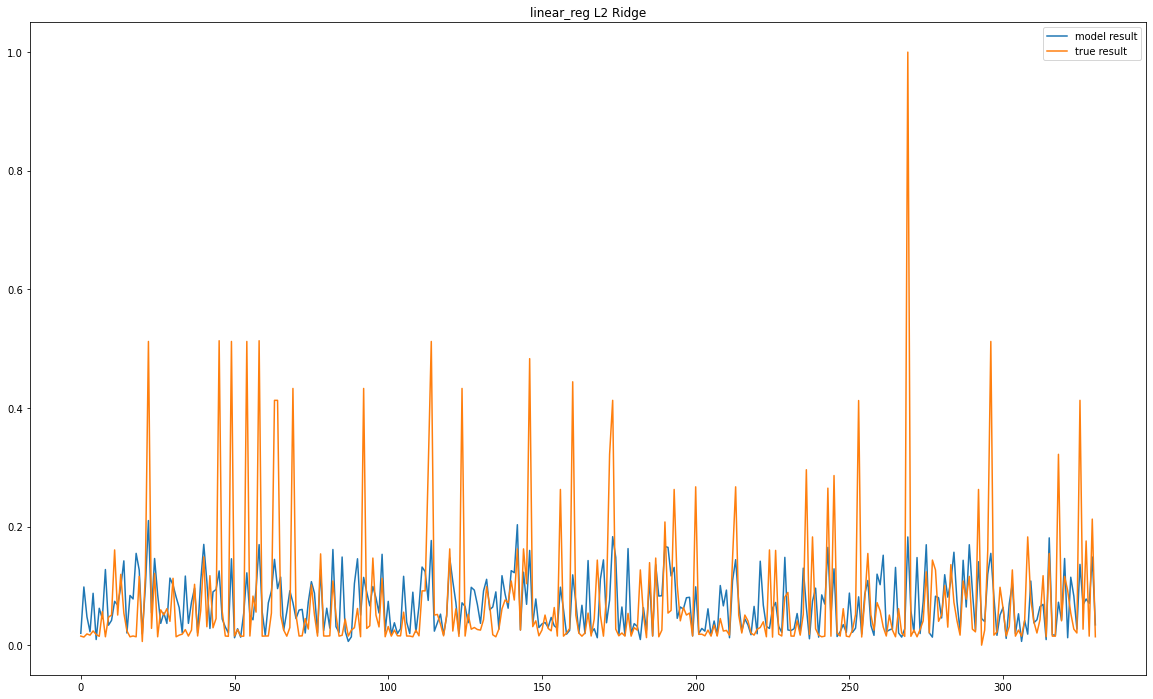

In [30]:
alfa_coef = 5
linear_reg_Ridge(y_train, X_train, y_test, X_test, alfa_coef)

После просмотра результатов и весов признаков мы видим, что использование L1 и L2 регуляризации не имеет смысла в данной задаче. Без регуляризации веса не имели огромные значения. После регуляризации и добавления штрафов на веса, мы получили ухудшение значения score.

### Отбор признаков с помощью L1 регуляризации, подобрать оптимального С